### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?


### Visualizing models over variables

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [3]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855,0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856,0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226,0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214,0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754,1,NaN


In [30]:
df.DAY_OF_WEEK.unique()

array([4, 5, 6, 7, 1, 2, 3])

In [10]:
df.count()

DAY_OF_MONTH             458311
DAY_OF_WEEK              458311
FL_DATE                  458311
UNIQUE_CARRIER           458311
AIRLINE_ID               458311
CARRIER                  458311
ORIGIN_AIRPORT_ID        458311
ORIGIN_AIRPORT_SEQ_ID    458311
ORIGIN_CITY_MARKET_ID    458311
DEST_AIRPORT_ID          458311
DEST_AIRPORT_SEQ_ID      458311
DEST_CITY_MARKET_ID      458311
CRS_DEP_TIME             458311
DEP_TIME                 458311
DEP_DEL15                458311
Unnamed: 15                   0
dtype: int64

In [1]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

NameError: name 'df' is not defined

In [5]:
df.shape

(458311, 37)

In [58]:
features += ['CRS_DEP_TIME']
model.fit(df[features[1:]], df['DEP_DEL15'])



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
print df[features].columns

Index([u'carrier_AA', u'carrier_AS', u'carrier_B6', u'carrier_DL',
       u'carrier_EV', u'carrier_F9', u'carrier_HA', u'carrier_MQ',
       u'carrier_NK', u'carrier_OO', u'carrier_UA', u'carrier_US',
       u'carrier_VX', u'carrier_WN', u'CRS_DEP_TIME', u'CRS_DEP_TIME',
       u'CRS_DEP_TIME'],
      dtype='object')


In [ ]:
df['probability'] = model.predict_proba(df[features[1:]]).T[1]

In [56]:
df.groupby("CARRIER").describe().apply(lambda group: len(group))

AIRLINE_ID               112
CRS_DEP_TIME             112
DAY_OF_MONTH             112
DAY_OF_WEEK              112
DEP_DEL15                112
DEP_TIME                 112
DEST_AIRPORT_ID          112
DEST_AIRPORT_SEQ_ID      112
DEST_CITY_MARKET_ID      112
ORIGIN_AIRPORT_ID        112
ORIGIN_AIRPORT_SEQ_ID    112
ORIGIN_CITY_MARKET_ID    112
Unnamed: 15              112
carrier_AA               112
carrier_AS               112
carrier_B6               112
carrier_DL               112
carrier_EV               112
carrier_F9               112
carrier_HA               112
carrier_MQ               112
carrier_NK               112
carrier_OO               112
carrier_UA               112
carrier_US               112
carrier_VX               112
carrier_WN               112
dow_1                    112
dow_2                    112
dow_3                    112
dow_4                    112
dow_5                    112
dow_6                    112
dow_7                    112
probability   

AttributeError: 'module' object has no attribute 'legends'

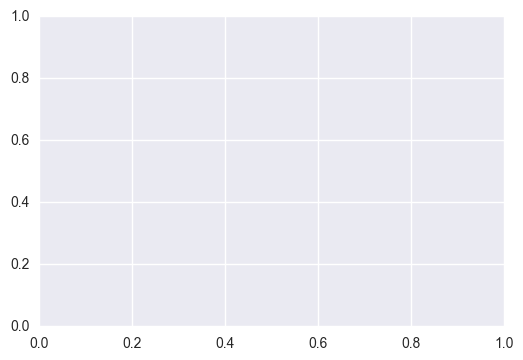

In [71]:
ax = plt.subplot(111)
plt.legends()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow','maroon', 'pink', 'teal', 'white', 'gold','silver']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of the Carrier')


### Other Answers: visualizing Airline or the inverse

In [32]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
#...

In [47]:
df[features[1:]].shape

(458311, 14)

In [54]:
print features[0]

carrier_AA


In [72]:
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[0]

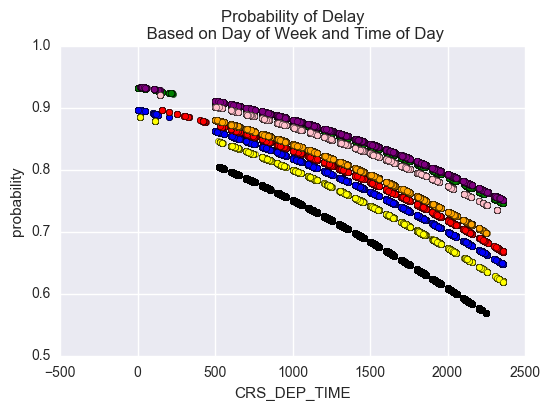

In [73]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'pink', 'black']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')



### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [1]:
from sklearn import dummy, metrics

In [2]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]


NameError: name 'df' is not defined

[(0, 1),
 (0, 1),

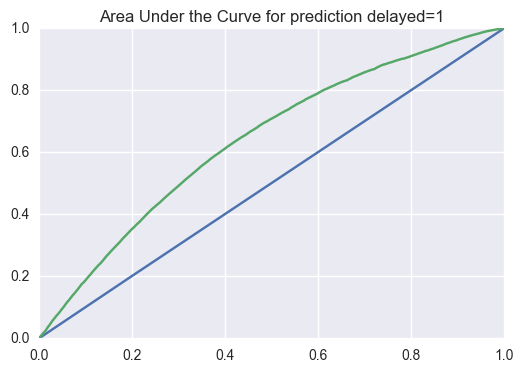

In [53]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

#### Visualizing Precision / Recall

In [ ]:
metrics.roc_auc_score()